K-Nearest Neighbours

Step 1 : Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Load Dataset

In [5]:
data = sns.load_dataset("iris")

print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 3: Feature Engineering

In [6]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
target = 'species'

Step 4: Split the data

In [7]:
X = data[features]
y = data[target]

le = LabelEncoder()
y = le.fit_transform(y)   #setosa=0 , vericolor=1 , viginica=2

X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size=0.2, random_state = 42
)

Step 5: Featrure Scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Step 6: Elbow Method to choose the best k

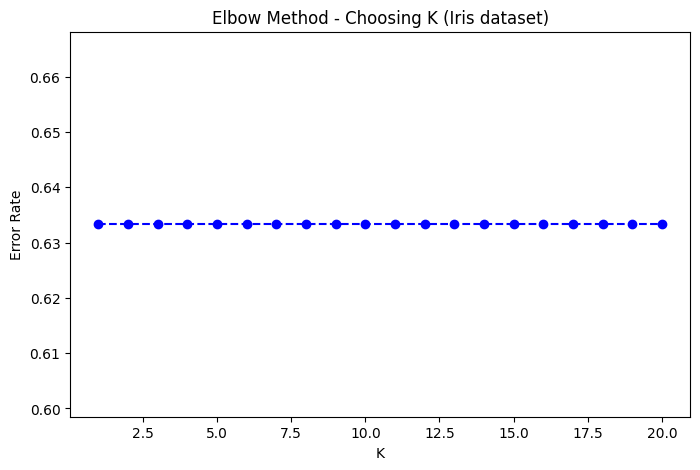

In [10]:
error_rates = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,21),error_rates, marker="o", linestyle='--',color="blue")
plt.title("Elbow Method - Choosing K (Iris dataset)")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

Step 7: Train final model with best K

In [13]:
best_k = error_rates.index(min(error_rates))+1
print(f"Best k found  {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification report:\n", classification_report(y_test,y_pred,target_names=le.classes_))

Best k found  1
Accuracy:  0.36666666666666664

Classification report:
               precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Step 8: Confusion Matrix

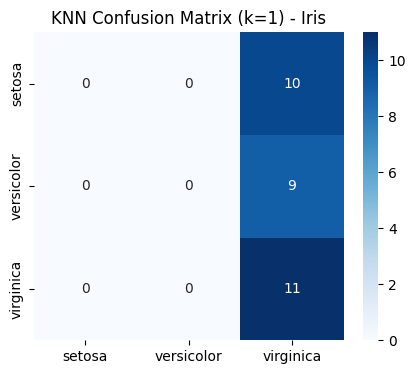

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test,y_pred),
    annot = True, fmt="d", cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title(f"KNN Confusion Matrix (k={best_k}) - Iris")
plt.show()